In [1]:
import numpy as np
import pandas as pd
import nltk
import nltk
from nltk.corpus import stopwords
import string
%matplotlib inline
import matplotlib.pyplot as plt

nltk.download('all')
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

In [16]:
#import metrics libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [3]:
#load the data
from google.colab import files
uploaded = files.upload()

Saving spam_ham_dataset.csv to spam_ham_dataset.csv


In [4]:
df =pd.read_csv('spam_ham_dataset.csv')

df.head(5)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [5]:
from sklearn.utils import shuffle
mail_df = shuffle(df)
len(mail_df)

5171

In [6]:
from sklearn.model_selection import train_test_split
mail_train, mail_test, y_train, y_test = train_test_split(mail_df['text'],mail_df['label'],test_size=0.33, random_state=42)

In [7]:
#for each word in the email text, get the base form of the word and return the list of base words
from textblob import TextBlob

def split_into_lemmas(message):
    message = message.lower()
    words = TextBlob(message).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words]

In [8]:
#function to apply the count vectorizer(BOW) and TF-IDF transforms to a set of input features
def features_transform(mail):
    #get the bag of words for the mail text
    bow_transformer = CountVectorizer(analyzer=split_into_lemmas).fit(mail_train)
    #print(len(bow_transformer.vocabulary_))
    messages_bow = bow_transformer.transform(mail)
    #print sparsity value
    print('sparse matrix shape:', messages_bow.shape)
    print('number of non-zeros:', messages_bow.nnz) 
    print('sparsity: %.2f%%' % (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])))
    #apply the TF-IDF transform to the output of BOW
    tfidf_transformer = TfidfTransformer().fit(messages_bow)
    messages_tfidf = tfidf_transformer.transform(messages_bow)
    #print(messages_tfidf.shape)
    #return result of transforms
    return messages_tfidf

In [9]:
#function which takes in y test value and y predicted value and prints the associated model performance metrics
def model_assessment(y_test,predicted_class):
    print('confusion matrix')
    print(confusion_matrix(y_test,predicted_class))
    print('accuracy')
    print(accuracy_score(y_test,predicted_class))
    print('precision')
    print(precision_score(y_test,predicted_class,pos_label='spam'))
    print('recall')
    print(recall_score(y_test,predicted_class,pos_label='spam'))
    print('f-Score')
    print(f1_score(y_test,predicted_class,pos_label='spam'))
    print('AUC')
    print(roc_auc_score(np.where(y_test=='spam',1,0),np.where(predicted_class=='spam',1,0)))
    plt.matshow(confusion_matrix(y_test, predicted_class), cmap=plt.cm.binary, interpolation='nearest')
    plt.title('confusion matrix')
    plt.colorbar()
    plt.ylabel('expected label')
    plt.xlabel('predicted label')

In [10]:
#transform training set features into a set of useful features to build models
from sklearn.feature_extraction.text import CountVectorizer
train_features=features_transform(mail_train)

sparse matrix shape: (3464, 35665)
number of non-zeros: 310496
sparsity: 0.25%


In [11]:
#create and fit NB model
from sklearn.naive_bayes import MultinomialNB
modelNB=MultinomialNB()

In [12]:
modelNB.fit(train_features,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [13]:
#transform test features to test the model performance
test_features=features_transform(mail_test)

sparse matrix shape: (1707, 35665)
number of non-zeros: 147879
sparsity: 0.24%


In [14]:
#NB predictions
predicted_class_NB=modelNB.predict(test_features)

confusion matrix
[[1195    0]
 [ 253  259]]
accuracy
0.8517867603983597
precision
1.0
recall
0.505859375
f-Score
0.6718547341115434
AUC
0.7529296875


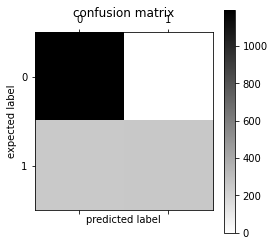

In [17]:
#assess NB
model_assessment(y_test,predicted_class_NB)